<a href="https://colab.research.google.com/github/OmarKhaledAbdlhafez/Coursat.ai-Computer-vision/blob/master/Assignment%20one%20/Dogs_vs_cats_with_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omarkhald","key":"d0e2d1d59f92aa173856c97f8ec99784"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.0MB/s]
 98% 535M/543M [00:05<00:00, 208MB/s]
100% 543M/543M [00:05<00:00, 104MB/s]
 94% 255M/271M [00:02<00:00, 130MB/s]
100% 271M/271M [00:02<00:00, 123MB/s]


In [0]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  train.zip


In [0]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

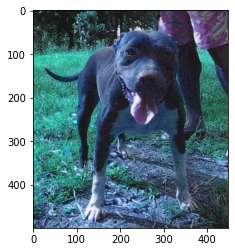

In [0]:
import cv2                 
import matplotlib.pyplot as plt
img= cv2.imread('train/dog.5546.jpg')
plt.imshow(img)

In [0]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return 0
    elif word_label == 'dog': return 1

In [0]:
import numpy as np         
import os                
from tqdm import tqdm 
from random import shuffle
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir('train')):
        label = label_img(img)
        path = os.path.join('train',img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (50,50))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    return training_data

In [0]:
train_data = create_train_data()

100%|██████████| 25000/25000 [00:25<00:00, 985.31it/s]


In [0]:
train = train_data[:-500]
test = train_data[-500:]
x_train = np.array([i[0] for i in train]).reshape(-1,50*50)
y_train = [i[1] for i in train]

x_test = np.array([i[0] for i in test]).reshape(-1,50*50)
y_test = [i[1] for i in test]

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.568


In [0]:
x = np.array([i[0] for i in train_data]).reshape(-1,50*50)
y = [i[1] for i in train_data]

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_cv = KNeighborsClassifier(n_neighbors=3)
result = cross_val_score(knn_cv , x, y,cv=5)
print (result.mean())

0.55116


In [0]:
def create_train_contour():
    training_data = []
    for img in tqdm(os.listdir('train')):
        label = label_img(img)
        path = os.path.join('train',img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (50,50))
        ret,thresh = cv2.threshold(img,127,255,0)
        contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        training_data.append([contours,np.array(label)])
    shuffle(training_data)
    return training_data

In [0]:
data = create_train_contour()
train_contour = train_data[:-500]
test_contour = train_data[-500:]
x_train_contour = np.array([i[0] for i in train_contour]).reshape(-1,50*50)
y_train_contour = [i[1] for i in train_contour]

x_test_contour = np.array([i[0] for i in test_contour]).reshape(-1,50*50)
y_test_contour = [i[1] for i in test_contour]

100%|██████████| 25000/25000 [00:25<00:00, 964.20it/s]


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_contour,y_train_contour)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
from sklearn.metrics import accuracy_score
y_pred_contour = knn.predict(x_test_contour)
score_con=accuracy_score(y_test_contour,y_pred_contour)
print(score_con)

0.568
